# **Industrial Engineering and Operations Research for Health Care**
**Mathematical Optimization Techniques Appointment and surgery Scheduling**

The colab book conatains code for 
1.   Patient appointment and scheduling implemented by Bailey-Welch rule and Soriano's rule. The patient waiting time and doctor's idle time for above two methods are calculated.

2. Simulated three different type Surgery scheduling for same distribution and calculated Total cost of keeping the OT idle & Total cost of keeping the patient and staff keep waiting for each schedule.

**Patient appointment and scheduling**

Considering the problem of scheduling appointments for a single practitioner. Finding an appropriate schedule for 'n' patients over 'x' hours with its performance by means of discrete event simulation. Assuming that the time a patient sits with the practitioner is roughly gamma distributed with a certain mean, and the standard deviation.


In [9]:
import numpy as np
def Gamma_Distribution(mean, stdv, n): #function which generate a gamma distribution with given mean and standard deviation
  variance = stdv ** 2 #variance calculation
  A = (mean**2) / variance
  B =  variance / mean
  #alpha and betta calculation for gamma distribution
  waiting_distribution = np.random.gamma(A,B,n)
  return waiting_distribution


In [10]:
def Plot_Hist(wait_time): #function for plotting histogram along with a line graph
  _, bins, _ = plt.hist(wait_time , 20, density= True, alpha=0.9, color='r')
  Mean, sigma = norm.fit(wait_time)
  best_fit_line = norm.pdf(bins, Mean, sigma)
  plt.plot(bins, best_fit_line, 'k', linewidth =  3)
  plt.show()


**(a)** Considering two patients are called for appointment. Simulation for the waiting time of the second patient to get service with histogram of the waiting times for sufficient large number of runs. This part is limited to only two patients.


The waiting time of Second patient calculted by simulation is 10.0


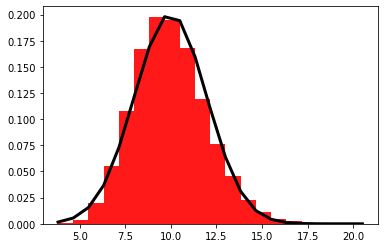

The histogram plot is skewwd at center with the mode of  10.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm
mean  = 10
stdv = 2
n = 2
runs = 10000 #running simulation times
#initializing variables
W = []
patient_wait_time =[]
for i in range(runs):
  W.append(list(Gamma_Distribution(mean, stdv, n))) #calling function
for i in W:
  for j in i:
   patient_wait_time .append(j)
mode = statistics.mode(np.round(patient_wait_time ))
print("The waiting time of Second patient calculted by simulation is", + mode)
Plot_Hist(patient_wait_time)
print("The histogram plot is skewwd at center with the mode of ", + (mode))

**(b)** Implementing the Bailey and Welch rule of calling two patients at start and then one patient every 12 minutes. Simulation run for large number of times until all patients are served to find out the average sum of all waiting times of all patients and the average practitioner idletime.

# **Bailey-Welch rule**

The  most  well-known  outpatient  appointment  rule  is the Bailey-Welch rule  (Bailey  1952,  Welch  1964) which  assigns  two appointments  for the very first slot and one appointment in the  rest of the slots. This rule was shown using queuing models and simulation studies with mean service times. It is considered as robust one.  

In [12]:
# Bailey and Welch's rule Implementation
import numpy as np
import matplotlib.pyplot as plt
mean  = 12
stdv = 3
n = 30
#initializing variables and lists
W =[]
WT =[]
runs = 10
total_patient_waiting = 0  
total_practitioner_waiting = 0  
for i in range(runs):
  patient_wait = 0
  practitioner_idle=0
  service_time = list (Gamma_Distribution(mean, stdv, n)) #calling function to generate a gamma distibution
  patient_wait = service_time[0]
  #Two patients called initially waiting time of 2nd patient is the service time of 1st patient
  if service_time[0] + service_time[1] <= mean: #check whether doctor is idle or patient will wait
    patient_wait = patient_wait
    practitioner_idle = practitioner_idle + (mean - service_time[0] - service_time[1])
  else :
    patient_wait = patient_wait + (service_time[0] + service_time[1]- mean)

  current_time = service_time[0] + service_time[1] + service_time[2]

  for j in range(1, n-2): #after 2 patients modelling for patients from 3 to 30
    n_time = mean*j
    if current_time <= mean + n_time: #check whether doctor is idle or patient will wait
      patient_wait = patient_wait
      practitioner_idle = practitioner_idle + (mean + n_time - current_time)
    else:
      patient_wait = patient_wait + (current_time - (mean+n_time))

    current_time = current_time + service_time[2+j] + practitioner_idle #current time for next player
  
  total_patient_waiting = total_patient_waiting + patient_wait
  total_practitioner_waiting = total_practitioner_waiting + practitioner_idle

Avg_patients_waiting_time = int(np.round(total_patient_waiting / (runs)))
Avg_patient_waiting_time = int(np.round(total_patient_waiting / (runs * n)))
Avg__practitioner_waiting_time = int(np.round(total_practitioner_waiting / runs))
print("Average idle time of the practitioner = " + str(Avg__practitioner_waiting_time) + " mins")
print("Average waiting time of one patient = " + str(Avg_patient_waiting_time) +  " mins")
print("Average waiting time of " + str(n) + " patients = " + str(Avg_patients_waiting_time) +  " mins")


Average idle time of the practitioner = 2 mins
Average waiting time of one patient = 19 mins
Average waiting time of 30 patients = 570 mins


**(c)** Implementing the Soriano’s rule of calling two patients at start and then two patients every 24 minutes. Simulation run for large number of times until all patients are served to find out the average sum of all waiting times of all patients and the average practitioner idletime.

# **Soriano's rule**
is based on Mixed-block appoinment system. In this system at each block two patients will be appointed, while one patient getting the service other one need to wait. 3rd and 4th person need to come during start of the second block.

In [13]:
# Soriano’s rule Implementation
import numpy as np
import matplotlib.pyplot as plt
mean  = 12
stdv = 3
n = 30
W =[]
WT =[]
runs = 10000
total_patient_waiting = 0  
total_practitioner_waiting = 0  
for i in range(runs):
  patient_wait = 0
  practitioner_idle=0
  service_time = list (Gamma_Distribution(mean, stdv, n)) #calling function to generate a gamma distibution
  patient_wait = service_time[0]
  #Two patients called initially waiting time of 2nd patient is the service time of 1st patient
  if service_time[0] + service_time[1] <= mean: #check whether doctor is idle or patient will wait
    patient_wait = patient_wait
    practitioner_idle = practitioner_idle + (mean - service_time[0] - service_time[1])
  else :
    patient_wait = patient_wait + (service_time[0] + service_time[1]- mean)

  current_time = service_time[0] + service_time[1] + service_time[2]

  for j in range(1, n-3, 2): #after 2 patients modelling for patients from 3 to 30 calling two patients at a time
    n_time = mean*(j +1) # j+1 modelled for 24 mins
    if current_time <= mean + n_time:
      patient_wait = patient_wait
      practitioner_idle = practitioner_idle + (mean + n_time - current_time)
    else:
      patient_wait = patient_wait + (current_time - (mean + n_time))

    current_time = current_time + service_time[2+j] + service_time[3+j] + practitioner_idle
  total_patient_waiting = total_patient_waiting + patient_wait
  total_practitioner_waiting = total_practitioner_waiting + practitioner_idle
#print(service_time)
Avg_patients_waiting_time = int(np.round(total_patient_waiting / (runs)))
Avg_patient_waiting_time = int(np.round(total_patient_waiting / (runs * n)))
Avg__practitioner_waiting_time = int(np.round(total_practitioner_waiting / runs))
print("Average idle time of the practitioner = " + str(Avg__practitioner_waiting_time) + " mins")
print("Average waiting time of one patient = " + str(Avg_patient_waiting_time) +  " mins")
print("Average waiting time of " + str(n) + " patients = " + str(Avg_patients_waiting_time) +  " mins")

Average idle time of the practitioner = 5 mins
Average waiting time of one patient = 11 mins
Average waiting time of 30 patients = 328 mins


# **Surgery scheduling**

Five surgeries are to be scheduled in an operation theatre. Assuming that the ratio of cost of keeping the OT idle to keeping the staff and patients waiting is 5, and the time in each surgery roughly follows a gamma distribution with certain mean and standard deviation. Three different schedules with ‘cost estimate’ of each schedule by means of simulation

In [14]:
import numpy as np 
def time(w, initial_time): #function to calculate time from minutes distribution
  hr = int(w // 60) + initial_time
  min = np.round(((w % 60) / 100), 2)
  Time = hr + min
  return np.round(Time, 2)


In [15]:
#3 different schedule times by simulation
import numpy as np
import matplotlib.pyplot as plt

mean = 50
std = 15
patients = 5
initial_time = 9
print("Considere the initial 1st surgery start at 9.00 in the morning")
for i in range(1,4):
  w_t=0   # paramter defined for waiting time 
  #waiting_time = [] 
  wait = [] # list of waiting tme of patients
  service_time = Gamma_Distribution(mean, std, patients) #randomly generated gamma distribution
  #waiting_time.append(w_t) # waiting time is 0 for first patient
  wait.append(initial_time) #surgery starting at 9
  for j in range(patients):
    w_t = w_t + service_time[j]
    #waiting_time.append(w_t)
    wait.append(time(w_t, initial_time))
  #print(waiting_time)
  print(str(i) + "th schedule")
  print(wait)

Considere the initial 1st surgery start at 9.00 in the morning
1th schedule
[9, 10.16, 11.2, 12.22, 12.56, 13.41]
2th schedule
[9, 9.47, 10.27, 10.44, 11.45, 12.23]
3th schedule
[9, 9.5, 10.52, 11.35, 12.08, 12.55]


In [16]:
#cost estimate for each schudule with estimated schudele times.
import numpy as np

mean = 50
std = 15
n = 5
initial_time = 9
runs = 3
cost = 5 #cost of keeping the OT idle to keep the patient & staff waiting
#print("Considere the initial 1st surgery start at 9.00 in the morning")

for i in range(runs):
  total_patient_waiting = 0  
  total_OT_idle = 0  
  w_t=0   # paramter defined for waiting time 
  waiting_time = [] 
  wait = [] # list of waiting time of patients
  service_time = Gamma_Distribution(mean, std, n) #randomly generated gamma distribution
  waiting_time.append(w_t) 
  wait.append(initial_time)
  for j in range(n):
    w_t = w_t + service_time[j]
    waiting_time.append(w_t)
    wait.append(time(w_t, initial_time))
  print('\033[1m' + "Schedule" + str(i+1) + '\033[0m')
  print(wait)
  #print(np.round(waiting_time, 2))
  patient_wait = 0
  OT_idle=0
  service_time = waiting_time #calling function to generate a gamma distibution
  #patient_wait = service_time[0]
  if service_time[0]  <= mean: #check whether OT is idle or patient will wait
    patient_wait = patient_wait
    OT_idle = OT_idle + (mean - service_time[0])
  else :
    patient_wait = patient_wait + (service_time[0])
    
  #print(service_time)
  #print(patient_wait)
  #print(OT_idle)
  current_time = service_time[0] + service_time[1] + OT_idle
  #print(current_time)
  for j in range(1, n): #after 2 patients modelling for patients from 3 to 30
    n_time = mean * j
    #print("current" , + current_time)
    #print("n_t" , + n_time)
    #print("su: " , + (current_time - n_time))
    if current_time <= n_time: #check whether doctor is idle or patient will wait
      patient_wait = patient_wait
      OT_idle = OT_idle + ( n_time - current_time)
    else:
      patient_wait = patient_wait + (current_time - n_time)
      OT_idle = OT_idle
    #print("j", + j)
    #print("patient ", + patient_wait)
    #print("ot " , + OT_idle)

    current_time =  service_time[1+j] #current time for next player
  total_patient_waiting = total_patient_waiting + patient_wait
  total_OT_idle = total_OT_idle + OT_idle
  Avg_patient_waiting_time = int(np.round(total_patient_waiting / ( n)))
  Avg__OT_idle = int(np.round(total_OT_idle))
  Avg__OT_idle_one = int(np.round(total_OT_idle / ( n)))
  cost_OT = Avg__OT_idle * cost

  #print("Average idle time of the OT for total 5 patient = " + str(Avg__OT_idle) + " mins")
  #print("Average idle time of the OT per patient  = " + str(Avg__OT_idle_one) + " mins")
  #print("Average waiting time for a patient and staffs = " + str(Avg_patient_waiting_time) +  " mins")
  #print("\n")
  print("Total cost of keeping the OT idle for 5 patients in schedule " + str(i + 1) + "  is = " + str(cost_OT))
  print("Total cost of keeping the patient and staff keep waiting in schedule " + str(i + 1) + " is = " + str(Avg_patient_waiting_time))
  print("\n")

Schedule1
[9, 9.25, 10.02, 11.09, 12.01, 12.55]
Total cost of keeping the OT idle for 5 patients in schedule 1  is = 640
Total cost of keeping the patient and staff keep waiting in schedule 1 is = 5


Schedule2
[9, 10.14, 11.2, 12.37, 13.5, 14.32]
Total cost of keeping the OT idle for 5 patients in schedule 2  is = 250
Total cost of keeping the patient and staff keep waiting in schedule 2 is = 54


Schedule3
[9, 9.46, 10.36, 11.4, 12.34, 13.37]
Total cost of keeping the OT idle for 5 patients in schedule 3  is = 270
Total cost of keeping the patient and staff keep waiting in schedule 3 is = 14


